## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# # Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, how="outer")

# # Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice= combined_mouse_data["Mouse ID"].value_counts()
mice_count=len(mice)
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice = combined_mouse_data.loc[combined_mouse_data.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_mouse_data[combined_mouse_data['Mouse ID'].isin(duplicate_mice)==False]

In [5]:
# Checking the number of mice in the clean DataFrame.
squeaky_mouse=clean_df["Mouse ID"].value_counts()
squeaky_number=len(squeaky_mouse)
squeaky_number

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimen_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
regimen_median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
regimen_variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
regimen_standard = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
regimen_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

regimen_mean
regimen_median
regimen_variance
regimen_standard
regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table= pd.DataFrame({"Mean": regimen_mean, "Median": regimen_median, "Variance": regimen_variance, "Standard Deviation": regimen_standard, "SEM": regimen_sem})
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

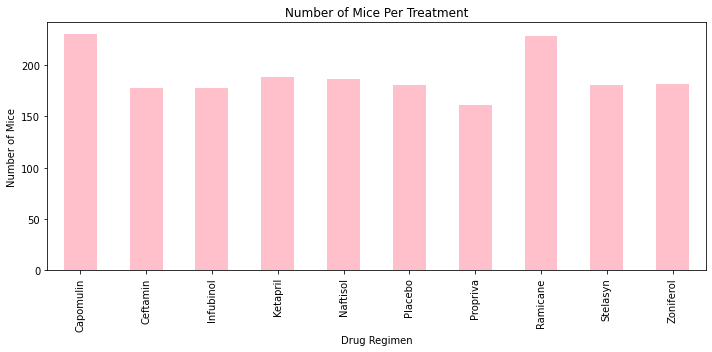

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_treatment_count= combined_mouse_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

bar_pandas= mouse_treatment_count.plot.bar(figsize=(10,5), color="pink")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Per Treatment")

plt.savefig("data/bar_pandas.png")
plt.tight_layout()
plt.show()

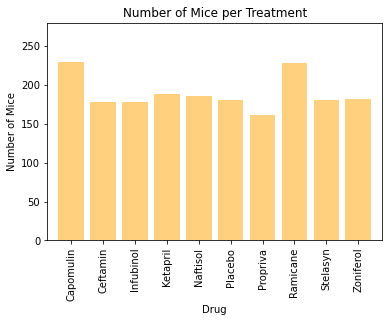

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice = (combined_mouse_data.groupby(["Drug Regimen"])["Mouse ID"].count().tolist())
mice
x_axis = np.arange(len(mouse_treatment_count))
plt.bar(x_axis, mice, color='orange', alpha=0.5, align="center")

tick_locations= [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice)+50)

plt.title("Number of Mice per Treatment")
plt.xlabel("Drug")
plt.ylabel("Number of Mice")
plt.show()

In [10]:
# Count gender
groupby_gender= combined_mouse_data.groupby(["Mouse ID", "Sex"])
gender_df= pd.DataFrame(groupby_gender.size())

mouse_gender= pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender

,0
Sex,
Female,124
Male,125


C:\Users\ellel\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


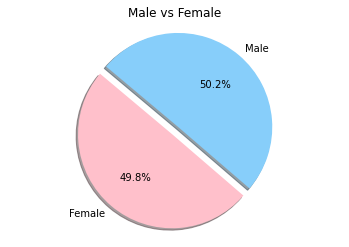

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = ["Female", "Male"]
sizes = [15,10]
colors = ["Pink","lightskyblue"]
explode = (0.1, 0)
plt.pie(mouse_gender, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male vs Female")
plt.axis("equal")
plt.show()

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Female", "Male"]
mouse_gender = [124,125]
colors = ["red","blue"]
explode = (0.1,0)

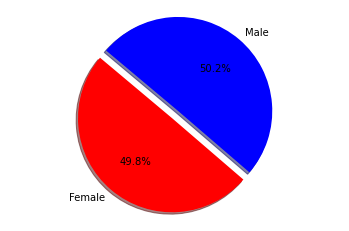

In [32]:
plt.pie(mouse_gender, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df= combined_mouse_data.loc[combined_mouse_data["Drug Regimen"]=="Capomulin",:]
Ramicane_df= combined_mouse_data.loc[combined_mouse_data["Drug Regimen"]=="Ramicane",:]
Infubinol_df= combined_mouse_data.loc[combined_mouse_data["Drug Regimen"]=="Infubinol",:]
Ceftamin_df= combined_mouse_data.loc[combined_mouse_data["Drug Regimen"]=="Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
